In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score





In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#delimiter has to be set to ';' in order to seperate the values
df = pd.read_csv('/Users/marcgomes/Downloads/StudentsAtRisk.csv', delimiter=';')
n_samples, n_features = df.shape
print("Number Of Samples: {} ".format(n_samples))
print ("Number of Features: {} ".format(n_features))

Number Of Samples: 4424 
Number of Features: 37 


In [6]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
print(df)

      Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1                                1             

In [8]:
#By calling df.info(), you get a quick overview of the DataFrame's characteristics, 
#such as the presence of missing values (null values), the data types of columns, 
#and the memory usage, which can be crucial for initial data assessment and preparation 
#steps in data analysis or machine learning workflows.

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [9]:
#All elements within a feature
#iterate through each column in a Pandas DataFrame (df) and analyzing the unique values within each column
#The purpose of this code snippet is to give a summary of the unique values in each column of the DataFrame. 
#For columns with a limited number of unique values (less than 12), it prints out those values to help understand 
#the categorical or discrete nature of the data within those columns. For columns with many unique values, it 
#provides a count without listing the individual values, likely to avoid overwhelming output when the number of 
#unique values is large.

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, nr_values))

The number of values for feature Marital status :6 -- [1 2 3 4 5 6]
The number of values for feature Application mode : 18
The number of values for feature Application order :8 -- [0 1 2 3 4 5 6 9]
The number of values for feature Course : 17
The number of values for feature Daytime/evening attendance	 :2 -- [0 1]
The number of values for feature Previous qualification : 17
The number of values for feature Previous qualification (grade) : 101
The number of values for feature Nacionality : 21
The number of values for feature Mother's qualification : 29
The number of values for feature Father's qualification : 34
The number of values for feature Mother's occupation : 32
The number of values for feature Father's occupation : 46
The number of values for feature Admission grade : 620
The number of values for feature Displaced :2 -- [0 1]
The number of values for feature Educational special needs :2 -- [0 1]
The number of values for feature Debtor :2 -- [0 1]
The number of values for feature

In [10]:
#used to detect missing or null values in a DataFrame.

df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [11]:
#attribute is used to get the column labels (column names) of a DataFrame.
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [12]:
#used to count the occurrences of each unique value in the column labeled 'Target' within the DataFrame df

df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [27]:
#mapping the values in y to numeric values based on the provided mapping. 
#In this case, it maps 'Dropout' and 'Graduate' to 0 and 'Enrolled' to 1. 
#This is a way of encoding categorical labels into binary values for binary classification.

X = df.drop('Target', axis=1)
y = df['Target']

y_binary = y.map({'Dropout': 0, 'Graduate': 2, 'Enrolled': 1})

print (y_binary.value_counts())





Target
2    2209
0    1421
1     794
Name: count, dtype: int64


In [28]:
#from sklearn.preprocessing import LabelEncoder

# Assuming y contains categorical class labels (enrolled, graduate, dropout)
#class_labels = ['enrolled', 'graduate', 'dropout']

# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Fit and transform y to encode class labels as integers
#y_encoded = label_encoder.fit_transform(y)

# Now, y_encoded contains integers representing classes (e.g., 0 for enrolled, 1 for graduate, 2 for dropout)


In [29]:
# Assuming y contains categorical class labels (enrolled, graduate, dropout)
#class_mapping = {'enrolled': 0, 'graduate': 1, 'dropout': 2}

# Map class labels to integers using a dictionary
#y_mapped = y.map(class_mapping)

# Now, y_mapped contains integers representing classes (e.g., 0 for enrolled, 1 for graduate, 2 for dropout)


In [30]:
#Splits the dataset (X, y_binary) into training and testing sets 
#(X_train, X_test, y_train, y_test) using a ratio of 80% for training 
#and 20% for testing. test_size = 0.2 indicates the proportion of the 
#dataset to include in the test split, and random_state = 42 sets the 
#seed for reproducibility.


#Initializes a RandomForestClassifier with specific parameters:
#n_estimators=500: Number of trees in the forest.
#max_features=int(0.5 * (X_train.shape[1])): 
#Number of features to consider when looking for the best split. 
#It's set to half the number of features.
#Fits the training data to the random forest classifier


#Calculates the out-of-bag score (oob_score) after fitting the model. 
#The out-of-bag score is a performance metric computed during training 
#using the samples that were not part of the bootstrap procedure for each 
#tree in the random forest.

#Predicts the target variable using the test set (X_test) and calculates 
#the accuracy score (accuracy) and classification report (report) based on the 
#predicted values compared to the actual test labels (y_test).



X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size = 0.2, random_state = 42)
rfc = RandomForestClassifier(n_estimators=1000, max_features=int(0.5 * (X_train.shape[1])), random_state=42, oob_score=True)

                             
rfc.fit(X_train, y_train)

# OOB score is available after the model has been fit
oob_score = rfc.oob_score_
                             
y_pred = rfc.predict(X_test)
                             
    
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy: .2f}")
print(f"Classification Report:\n{report}")
print(f"OOB Score: {oob_score:.2f}")
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             
                             

Accuracy:  0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       316
           1       0.50      0.36      0.42       151
           2       0.78      0.92      0.84       418

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.76      0.75       885

OOB Score: 0.78


In [34]:
#Hyperparameter Tuning

#It sets up a grid of hyperparameters for the Random Forest Classifier (RandomForestClassifier) 
#using the param_grid dictionary. This grid includes various values for n_estimators (number of trees) 
#and max_features (number of features considered for splitting).

#GridSearchCV to search through the hyperparameter grid (param_grid) using 5-fold cross-validation 
#(cv=5) and the F1-score (scoring='f1') as the evaluation metric. verbose=1 is used to display the progress.


#Once the grid search finds the best set of hyperparameters (best_params), it retrains the Random Forest 
#Classifier (best_estimator) using the entire training dataset (X_train, y_train).

#makes predictions (y_pred) on the test set (X_test) using the retrained best estimator and calculates 
#the accuracy score (accuracy) and classification report (report) based on the predicted values compared 
#to the actual test labels (y_test).

#prints the best parameters found, accuracy, classification report, best F1 score (best_f1_score), and 
#best OOB score (best_oob_score) obtained from the grid search.




# Your data preparation steps go here (loading data, splitting into train/test sets, etc.)

param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_features': [int(0.5 * (X_train.shape[1]) ** 0.5), int((X_train.shape[1]) ** 0.5), int(2 * (X_train.shape[1]) ** 0.5)]
}

rfc = RandomForestClassifier(random_state=42, oob_score=True, class_weight='balanced')

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='f1_macro', verbose=1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Cross-validated F1 scores with 'macro' averaging strategy
cv_scores_macro = cross_val_score(best_estimator, X_train, y_train, cv=5, scoring='f1_macro')

best_estimator.fit(X_train, y_train)
y_pred = best_estimator.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Cross-validated F1 scores (macro): {cv_scores_macro}")
print(f"Average F1 score (macro): {cv_scores_macro.mean():.2f}")

print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:\n {report}")

# Access best F1 score and OOB score
best_f1_score = grid_search.best_score_
best_oob_score = best_estimator.oob_score_

print(f"Best F1 Score: {best_f1_score:.2f}")
print(f"Best OOB Score: {best_oob_score:.2f}")




Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'max_features': 12, 'n_estimators': 500}
Cross-validated F1 scores (macro): [0.67897569 0.71755813 0.70559984 0.69404305 0.72014341]
Average F1 score (macro): 0.70
Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       316
           1       0.52      0.34      0.41       151
           2       0.78      0.93      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.68       885
weighted avg       0.75      0.77      0.75       885

Best F1 Score: 0.70
Best OOB Score: 0.78


In [35]:
#retraining of the model after hyperparameters are fitted to model.

from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier with the best hyperparameters
best_rfc = RandomForestClassifier(n_estimators=500, max_features=12, random_state=42,oob_score=True )

# Retrain the model on the entire dataset
best_rfc.fit(X, y)


RandomForestClassifier(max_features=12, n_estimators=500, oob_score=True,
                       random_state=42)

In [40]:
#Both metrics provide different insights into the model's 
#performance. ROC AUC focuses on the trade-off between true 
#positive rate and false positive rate across different threshold 
#values, while accuracy gives a simple overall measure of correctness 
#of the predictions.

#the roc_auc_score function from scikit-learn to compute the Receiver 
#Operating Characteristic Area Under the Curve (ROC AUC) score.

#calculates the accuracy of the models predictions 




# Assuming you have your predictions (y_pred) and actual target labels (y_test)

# Assuming you have your predictions (y_pred) and actual target labels (y_test)
#roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovo')
#print(f"ROC AUC Score: {roc_auc:.4f}")

#accuracy = accuracy_score(y_test, y_pred)  # Pass the true labels and predicted labels here
#print(f"Accuracy: {accuracy:.4f}")


from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Assuming y_test and y_pred are your true and predicted labels for multiclass classification

# Transform the multiclass labels into a binary format (if not already)
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Replace [0, 1, 2] with your classes

# Calculate ROC AUC score using 'ovo' (One-vs-One) strategy for multiclass
roc_auc = roc_auc_score(y_test_binarized, best_rfc.predict_proba(X_test), multi_class='ovo')

print(f"ROC AUC Score: {roc_auc:.4f}")

accuracy = accuracy_score(y_test, y_pred)  # Pass the true labels and predicted labels here
print(f"Accuracy: {accuracy:.4f}")



ROC AUC Score: 1.0000
Accuracy: 0.7684


In [44]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have trained your model (best_rfc) and obtained predictions on the test set
# Replace y_test with your actual test labels and y_pred_proba with your predicted probabilities

# Predicting probabilities (required for ROC-AUC)
y_pred_proba = best_rfc.predict_proba(X_test)  # Probabilities for all classes

# Accuracy, Precision, Recall, F1-score (same as before)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# ROC-AUC score (for multiclass)
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted') 
# Change 'ovr' to 'ovo' if you want One-vs-One strategy

# OOB score (same as before)
oob_score = best_rfc.oob_score_

# Printing the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"OOB Score: {oob_score:.4f}")




Accuracy: 0.7684
Precision: 0.7548
Recall: 0.7684
F1-score: 0.7545
ROC-AUC Score: 1.0000
OOB Score: 0.7783


In [45]:

#This process helps assess how the model's predictive performance varies when different subsets of features, 
#selected based on importance thresholds, are used


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the RandomForestClassifier model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Get feature importances
feature_importances = rfc.feature_importances_

# Experiment with different threshold values
for threshold in [0.01, 0.02, 0.03, 0.04]:  # Example thresholds
    selected_features = X.columns[feature_importances > threshold]
    
    # Ensure that the selected features exist in both training and test sets
    common_features = set(selected_features).intersection(X_test.columns)
    
    if len(common_features) > 0:
        X_train_selected = X_train[list(common_features)]
        X_test_selected = X_test[list(common_features)]
        
        # Train and evaluate the model using X_train_selected and X_test_selected
        rfc_selected = RandomForestClassifier()
        rfc_selected.fit(X_train_selected, y_train)
        y_pred = rfc_selected.predict(X_test_selected)
        
        # Evaluate the model's performance
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Threshold: {threshold}, Accuracy: {accuracy:.4f}")
    else:
        print(f"No common features found for threshold {threshold}.")



Threshold: 0.01, Accuracy: 0.7537
Threshold: 0.02, Accuracy: 0.7559
Threshold: 0.03, Accuracy: 0.7446
Threshold: 0.04, Accuracy: 0.6915


In [46]:
from sklearn.feature_selection import SelectFromModel

# Assuming you have trained your initial model and obtained feature importances
# Create an instance of SelectFromModel with your pre-trained model (e.g., rfc_selected)
threshold = 0.004  # Set your desired threshold value
selector = SelectFromModel(rfc_selected, threshold=threshold)

# Fit the selector on the training data to choose important features
selector.fit(X_train, y_train)

# Get the selected feature indices and transform the datasets
selected_features_indices = selector.get_support(indices=True)
X_train_selected = X_train.iloc[:, selected_features_indices]
X_test_selected = X_test.iloc[:, selected_features_indices]

# Retrain the model on the selected features
rfc_final = RandomForestClassifier()
rfc_final.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_final = rfc_final.predict(X_test_selected)

# Evaluate the model's performance after retraining
accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"Accuracy after retraining: {accuracy_final:.4f}")


Accuracy after retraining: 0.7661


In [52]:
# Assuming you've determined the column names of the selected features
selected_features = ['Marital status', 'International', 'Nacionality']  # Replace with actual feature names

# Rest of your code to retrain the model using selected features
if len(selected_features) > 0:
    X_train_final = X_train[selected_features]
    X_test_final = X_test[selected_features]
    
    rfc_final = RandomForestClassifier()
    rfc_final.fit(X_train_final, y_train)
    
    y_pred_final = rfc_final.predict(X_test_final)
    
    # Evaluate the model's performance after retraining
    accuracy_final = accuracy_score(y_test, y_pred_final)
    print(f"Accuracy after retraining: {accuracy_final:.4f}")
else:
    print("No features were selected.")




Accuracy after retraining: 0.4938


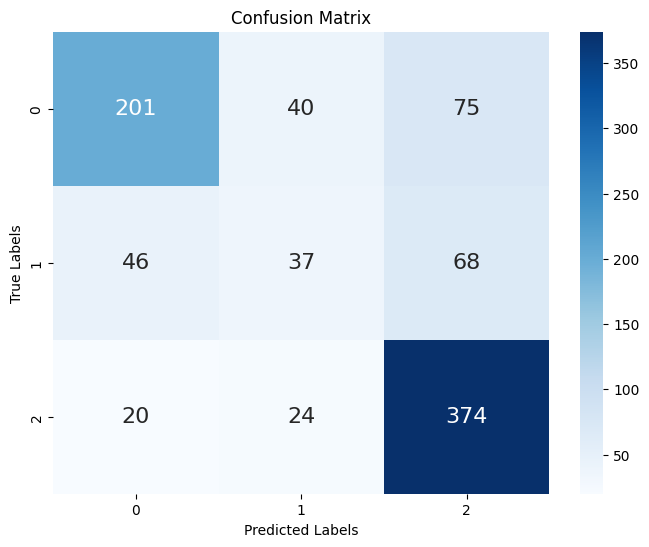

In [53]:
#This visualization aids in understanding the model's performance by illustrating the true positives, 
#true negatives, false positives, and false negatives in a more interpretable format using color-coded cells. 
#It provides a clear visual representation of how well the model is predicting different classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix




# Assuming you have predictions (y_pred) and actual labels (y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


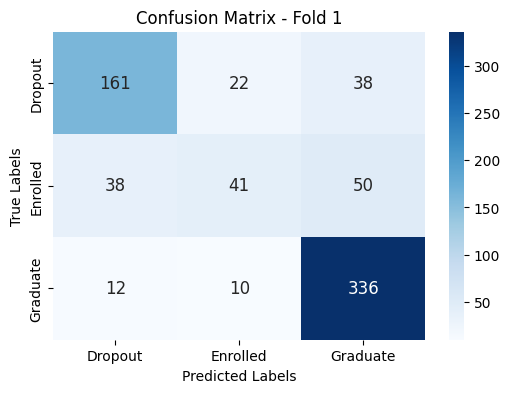

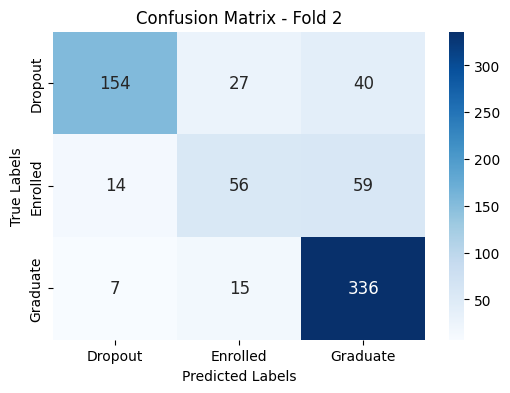

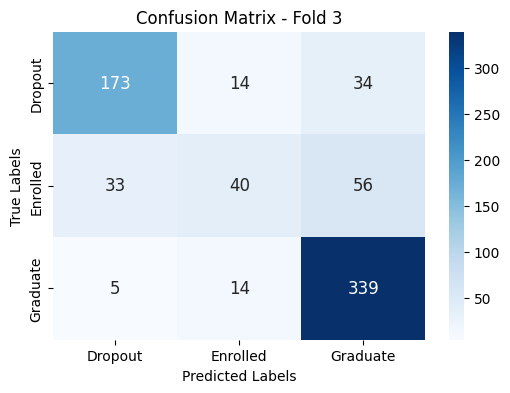

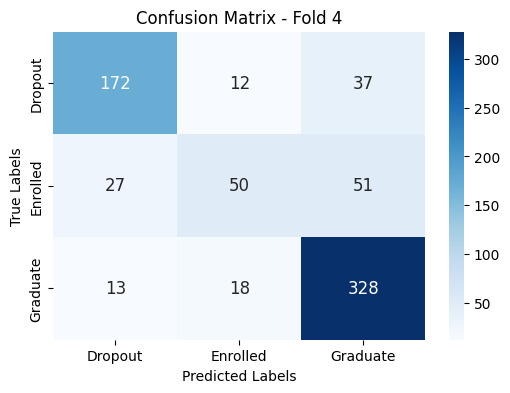

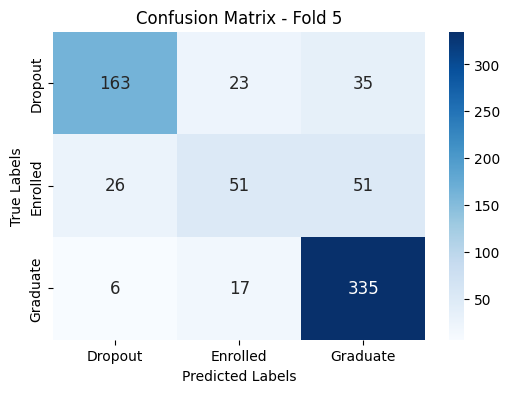

In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone




# Assuming you have obtained the labels from your dataset
labels = ['Dropout', 'Enrolled', 'Graduate']

# Your previous code for grid search and obtaining the best estimator
# ...

# Perform k-fold cross-validation with the best estimator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Define your desired number of splits
fold = 1
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Clone the best estimator to ensure a fresh model for each fold
    rf_model = clone(best_estimator)
    
    # Train the model on the current fold
    rf_model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the test fold
    y_pred_fold = rf_model.predict(X_test_fold)
    
    # Generate the confusion matrix for this fold
    conf_matrix = confusion_matrix(y_test_fold, y_pred_fold)
    
    # Create a heatmap for the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
    
    # Set labels for both axes
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - Fold {fold}')
    
    # Set x and y tick labels with the specified target labels
    plt.xticks(ticks=np.arange(len(labels))+ 0.5, labels=labels)
    plt.yticks(ticks=np.arange(len(labels))+ 0.5, labels=labels)
    
    plt.show()
    
    fold += 1



Yes, it is entirely valid and expected to have a confusion matrix of size 3x3 if your classification problem involves three classes: "dropout," "graduate," and "enrolled." In a multiclass classification scenario with three distinct classes, the confusion matrix will represent the counts of true positive, true negative, false positive, and false negative predictions for each class.

Here's how a 3x3 confusion matrix might look in your scenario:



           Predicted
            dropout    graduate    enrolled
Actual
dropout       TP          FN          FN
graduate      FP          TP          FN
enrolled      FP          FP          TP


TP (True Positive): Correctly predicted as the respective class.
TN (True Negative): Correctly predicted as not belonging to the respective class.
FP (False Positive): Incorrectly predicted as the respective class.
FN (False Negative): Incorrectly predicted as not belonging to the respective class.


Each cell in the confusion matrix represents the counts of these occurrences for each class against all the other classes. This matrix helps to evaluate the performance of a model trained on multiclass classification by understanding where the model's predictions match or deviate from the actual class labels across all classes.

In [55]:
X_train.shape, X_test.shape

((3539, 36), (885, 36))

In [56]:
X_train.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [57]:
X_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
3383,4,7,1,9147,1,3,130.0,1,19,1,...,0,0,5,5,0,0.000000,0,11.1,0.6,2.02
2840,1,39,1,9085,1,1,130.0,1,37,37,...,0,0,6,14,2,11.333333,0,11.1,0.6,2.02
564,1,1,6,9070,1,6,119.0,1,1,1,...,0,0,6,8,6,13.625000,0,10.8,1.4,1.74
1786,2,39,1,9238,1,19,133.1,1,37,37,...,0,0,6,0,0,0.000000,0,15.5,2.8,-4.06
3900,1,1,3,9500,1,1,142.0,1,37,38,...,0,0,7,7,6,13.900000,0,7.6,2.6,0.32


In [58]:
print('Model accuracy score with 500 decision trees : {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score with 500 decision trees : 0.6915


In [59]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns.sort_values(ascending=False))

In [60]:
feature_scores

Unemployment rate                                 0.003336
Tuition fees up to date                           0.020014
Scholarship holder                                0.014271
Previous qualification (grade)                    0.033175
Previous qualification                            0.003062
Nacionality                                       0.005940
Mother's qualification                            0.037818
Mother's occupation                               0.002522
Marital status                                    0.020465
International                                     0.021285
Inflation rate                                    0.025286
Gender                                            0.029393
GDP                                               0.042618
Father's qualification                            0.007672
Father's occupation                               0.001067
Educational special needs                         0.010870
Displaced                                         0.0396

/var/folders/lh/jdrlwv097f56pgny36pk573h0000gn/T/ipykernel_85047/3344935993.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bp.set_xticklabels(bp.get_xticklabels(), fontsize =7)
/Users/marcgomes/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


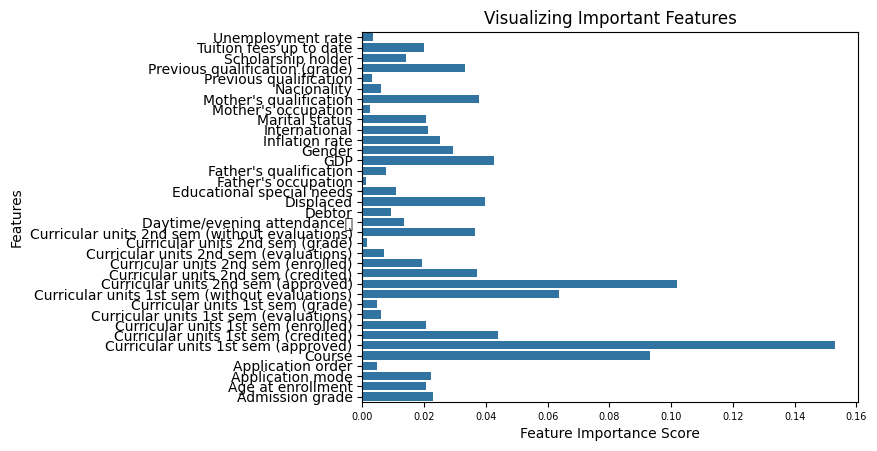

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your code for creating the bar plot


# Set the ticks explicitly


# Set the font size for x-axis tick labels



bp = sns.barplot(x = feature_scores, y = feature_scores.index)
bp.set_xticklabels(bp.get_xticklabels(), fontsize =7)
plt.xlabel('Feature Importance Score') 
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [64]:
confusion_matrix(y_test, y_pred)

array([[201,  40,  75],
       [ 46,  37,  68],
       [ 20,  24, 374]])

In [65]:
# Calculate permutation importance
perm_importance = permutation_importance(rf_model,X_test_selected , y_test) # Sort the indices of feature importance in descending order
sorted_idx = (-perm_importance.importances_mean).argsort() # Get the top 10 features
top_10_features = sorted_idx[:10]
# Extract the names of the top 10 features
top_10_feature_names = X_test_selected.columns[top_10_features]
# Create a bar plot for the top 10 features
plt.barh(top_10_feature_names, perm_importance.importances_mean[top_10_features]) plt.xlabel("Permutation Importance")
plt.show()

SyntaxError: invalid syntax (3248722436.py, line 8)